# Case Study : Sales Prediction

$Problem \ Statement \\ $
Build model predicts sales based on the money spent different platforms for marketing

$Data \\ $
We use the advertising dataset and analyse the relationship between "TV Radio and Newspaper Advertising" and "Sales" using a __Simple Linear Regression Model__


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df1 = pd.read_csv("advertising.csv")

In [87]:
df1.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,12.0
3,3,151.5,41.3,58.5,16.5
4,4,180.8,10.8,58.4,17.9


In [88]:
advert = df1.iloc[:,1:]
advert.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [89]:
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [90]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Tidak terdapat data yang missing value

In [91]:
advert.shape

(200, 4)

In [92]:
advert.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [136]:
advert.isnull().sum()*100/advert.shape[0] # Tidak terdapat data yang bernilai Null

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

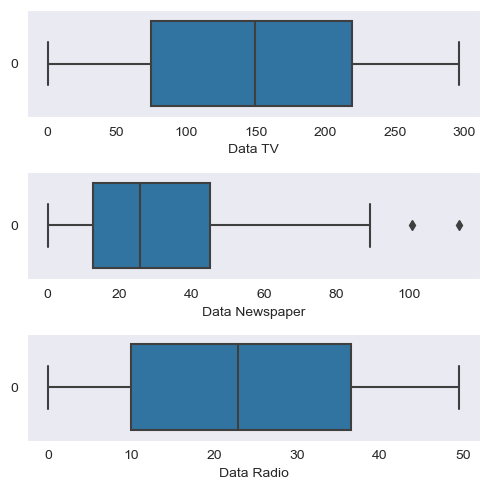

In [143]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advert['TV'], orient='h', ax = axs[0])
axs[0].set_xlabel('Data TV')
plt2 = sns.boxplot(advert['Newspaper'], orient='h', ax = axs[1])
axs[1].set_xlabel('Data Newspaper')
plt3 = sns.boxplot(advert['Radio'], orient='h', ax = axs[2])
axs[2].set_xlabel('Data Radio')
plt.tight_layout()

- Pada Data TV berbentuk distribusi normal dan tidak dapat data outlier
- Pada Data Newspaper berbentuk skew positif dan terdapat beberapa data outlier
- Sedangkan pada data Radio mendekati distribusi normal dan tidak terdapat data outlier

### Exploratort Data Analysis

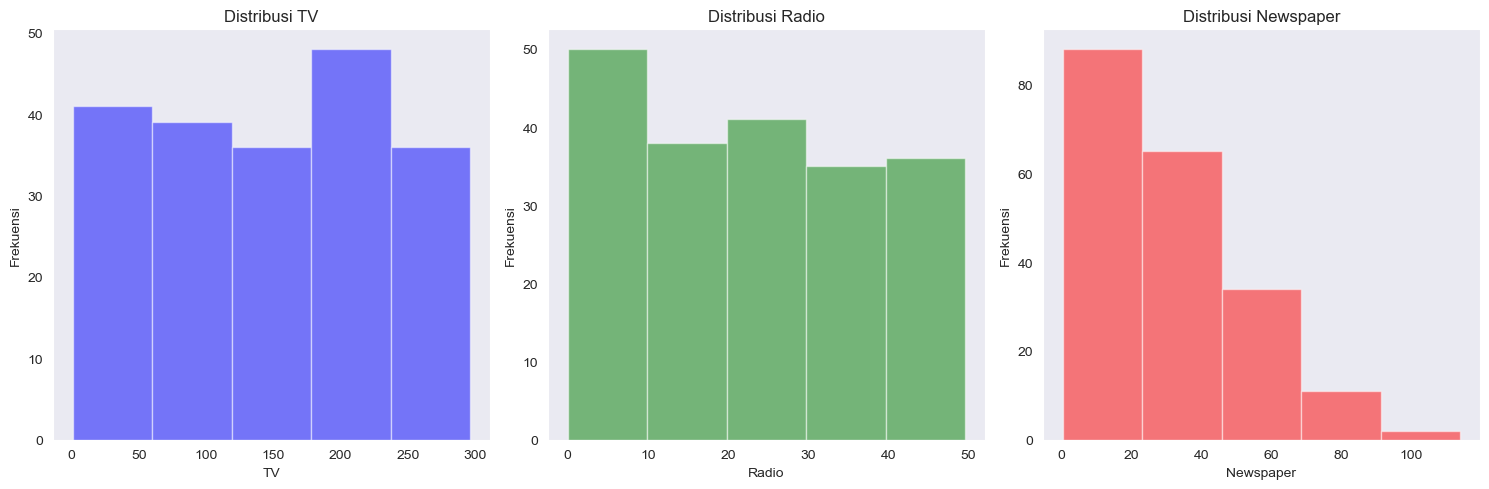

In [132]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot TV
axs[0].hist(advert["TV"], bins=5, color='blue', alpha=0.5)
axs[0].set_xlabel("TV")
axs[0].set_ylabel('Frekuensi')
axs[0].set_title('Distribusi TV')

# Plot Radio
axs[1].hist(advert["Radio"], bins=5, color='green', alpha=0.5)
axs[1].set_xlabel('Radio')
axs[1].set_ylabel('Frekuensi')
axs[1].set_title('Distribusi Radio')

# Plot Newspaper
axs[2].hist(advert["Newspaper"], bins=5, color='red', alpha=0.5)
axs[2].set_xlabel('Newspaper')
axs[2].set_ylabel('Frekuensi')
axs[2].set_title('Distribusi Newspaper')

# Menampilkan semua subplots
plt.tight_layout()
plt.show()


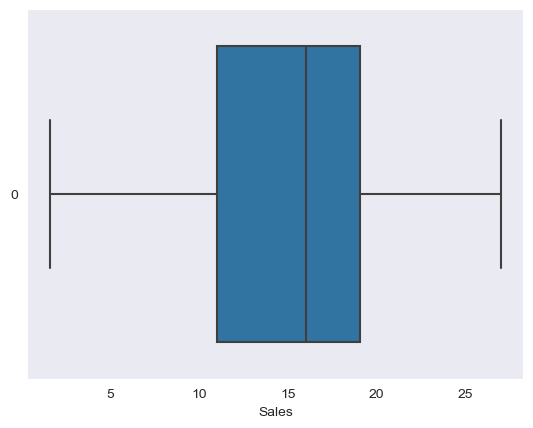

In [145]:
sns.boxplot(advert['Sales'], orient = "h")
plt.xlabel("Sales")
plt.show()

Pada data target (Sales) berbentuk distribusi normal

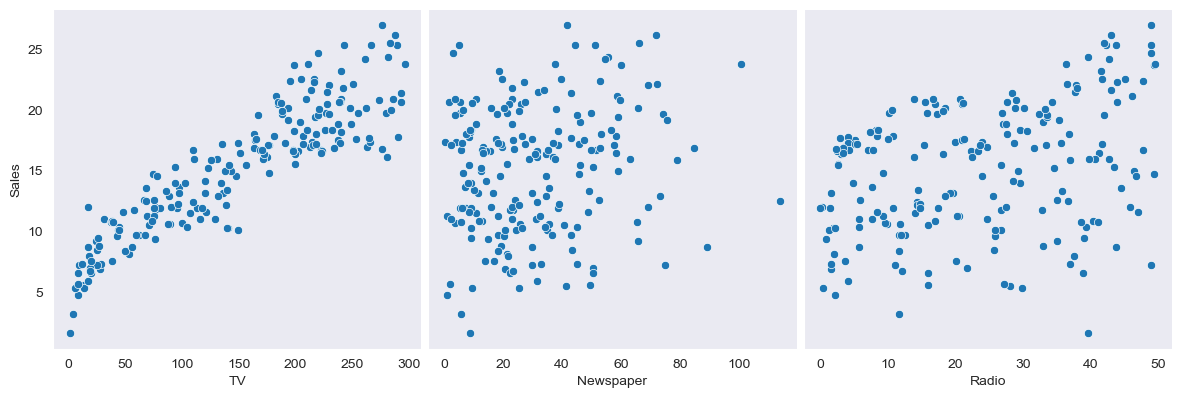

In [96]:
sns.pairplot(advert, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
sns.set_style("dark")
plt.show()

- TV memiliki korelasi positif terhadap data target (sales) sehingga layak untuk dijadikan variabel prediktor karena mempengaruhi tingkat penjualan
- Newspaper dan Radio tidak memiliki korelasi positif dan cenderung acak pada targetnya sehingga tidak perlu digunakan dalam permodelan

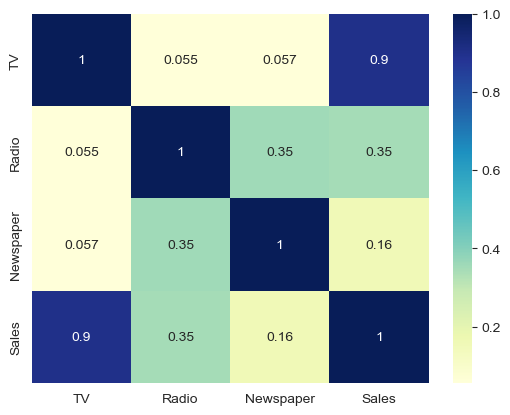

In [97]:
sns.heatmap(advert.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Modelling

#### $Simple \ \ linear \ \ Regression$

$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

the feature variabel TV (X) and the response variable Sales to the variable (y)

In [146]:
X = advert.drop(columns=['Sales'])
y = advert['Sales']

In [147]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

 It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [101]:
X_train.head()

,TV,Radio,Newspaper
74,213.4,24.6,13.1
3,151.5,41.3,58.5
185,205.0,45.1,19.6
26,142.9,29.3,12.6
90,134.3,4.9,9.3


In [102]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

#### Building a Linear Model

In [103]:
import statsmodels.api as sm

In [104]:
from  sklearn.ensemble  import  RandomForestRegressor
from  sklearn.metrics  import  mean_squared_error
from  xgboost  import  XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [105]:
from sklearn.linear_model import LinearRegression
lr_model = XGBRegressor()
lr_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [106]:
#Returns the mean squared error; we'll take a square root
y_pred = lr_model.predict(X_test)
print("MSE  : " ,mean_squared_error(y_test, y_pred))
print("RMSE : " ,np.sqrt(mean_squared_error(y_test, y_pred)))

MSE  :  1.7209355894486629
RMSE :  1.3118443465017726


In [107]:
# Ridge Regression
rr = Ridge(alpha=0.01)

rr.fit(X_train, y_train) 

y_pred = rr.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.6235998440997523

In [108]:
# Lasso Regression
lr = Lasso(alpha=0.01)

lr.fit(X_train, y_train) 

y_pred = lr.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.6234474141602508

#### Building a XGboost Model

In [109]:
xg_model = XGBRegressor(n_estimators=10000)
xg_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [110]:
#Returns the mean squared error; we'll take a square root
y_pred = xg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.311906651179574

In [111]:
mean_squared_error(y_test, y_pred)

1.7210990614092048

In [112]:
from sklearn.model_selection import RandomizedSearchCV
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

In [113]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=xg_model,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(X_train,y_train)

random_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


XGBRegressor(base_score=0.75, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [114]:
xg_model_tunned = XGBRegressor(base_score=0.75, learning_rate=0.15, max_depth=2,
             min_child_weight=3, n_estimators=500)
xg_model_tunned.fit(X_train,y_train)

XGBRegressor(base_score=0.75, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [115]:
#Returns the mean squared error; we'll take a square root
y_pred = xg_model_tunned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.286694131563001

In [116]:
mean_squared_error(y_test, y_pred)

1.6555817881986654

#### Evaluation Model

1. Residual : To validate assumptions of the model, and hence the reliability for inference
2. Distribution error terms : We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression)




In [117]:
y_train_pred = lr_model.predict(X_train)
res = (y_train - y_train_pred)

C:\Users\Khansa\AppData\Local\Temp\ipykernel_22648\1173469960.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


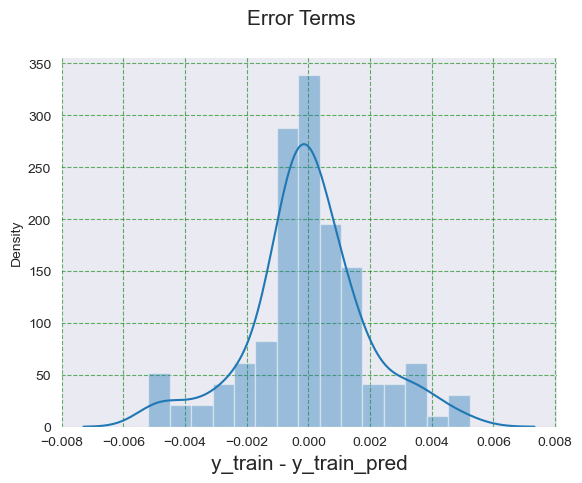

In [118]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.grid(True, linestyle='--', color='green', alpha=0.6)
plt.show()

Residual telah berdistribusi normal

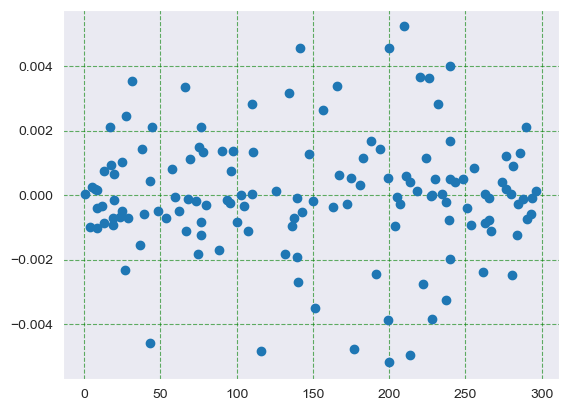

In [119]:
plt.scatter(X_train['TV'],res)
plt.grid(True, linestyle='--', color='green', alpha=0.6)
plt.show()

Telah memenuhi asumsi residual data menyebar secara acak dan tidak membentuk pola

#### Prediction on The Test Set

In [120]:
# Predict the y values corresponding to X_test_sm
y_pred = lr_model.predict(X_test)

In [121]:
X_final_test = X_test.copy()
X_final_test['real'] = y_test

In [122]:
X_final_test['pred'] = y_pred

In [123]:
X_final_test.head()

,TV,Radio,Newspaper,real,pred
126,7.8,38.9,50.6,6.6,5.358582
104,238.2,34.3,5.3,20.7,20.245481
99,135.2,41.7,45.9,17.2,15.937408
92,217.7,33.5,59.0,19.4,18.552502
111,241.7,38.0,23.2,21.8,22.549793


In [124]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [125]:
#Returns the mean squared error; we'll take a square root
print("RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE :  1.3118443465017726


In [126]:
r_squared = r2_score(y_test, y_pred)
print("R-Square : " , r_squared)

R-Square :  0.9122569897138559


In [127]:
#adjusted R square
r_squared = r2_score(y_test, y_pred)
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adj RSquare : " ,adjusted_r_squared)

Adj RSquare :  0.9109139844543741


##### Visualizing the fit on the test set 

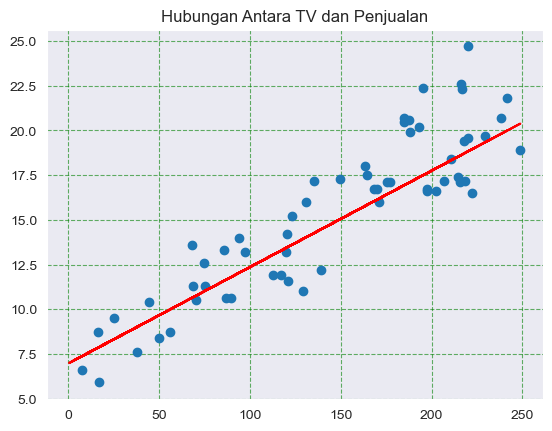

In [128]:
plt.scatter(X_test['TV'], y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.title('Hubungan Antara TV dan Penjualan')
plt.grid(True, linestyle='--', color='green', alpha=0.6)
plt.show()